In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
netflix_data = pd.read_csv('kanji_freq_report.txt', sep='\t', header=None, names=['times_used', 'kanji', 'rank1', 'rank2', 'percentage_usage', 'cumulative_percentage'], usecols=[0,1,2,4,5]).head(2136)

jouyou_data = pd.read_csv('jouyou-kanji.csv', sep=' ', header=None, names=['kanji', 'description'], usecols=[0, 1])

print(netflix_data.head())
print(jouyou_data.head())

   times_used kanji  rank1  percentage_usage  cumulative_percentage
0      817004     人      1          1.538199               1.538199
1      743033     何      2          1.398931               2.937130
2      578766     私      3          1.089661               4.026790
3      508472     分      4          0.957316               4.984106
4      484479     見      5          0.912144               5.896250
  kanji description
0     一         one
1     乙      latter
2     九        nine
3     七       seven
4     十         ten


In [41]:
# Add a new column to netflix_data to indicate if the kanji is in the Jouyou list
netflix_data['is_jouyou'] = netflix_data['kanji'].isin(jouyou_data['kanji'])

print(netflix_data.head())

   times_used kanji  rank1  percentage_usage  cumulative_percentage  is_jouyou
0      817004     人      1          1.538199               1.538199       True
1      743033     何      2          1.398931               2.937130       True
2      578766     私      3          1.089661               4.026790       True
3      508472     分      4          0.957316               4.984106       True
4      484479     見      5          0.912144               5.896250       True


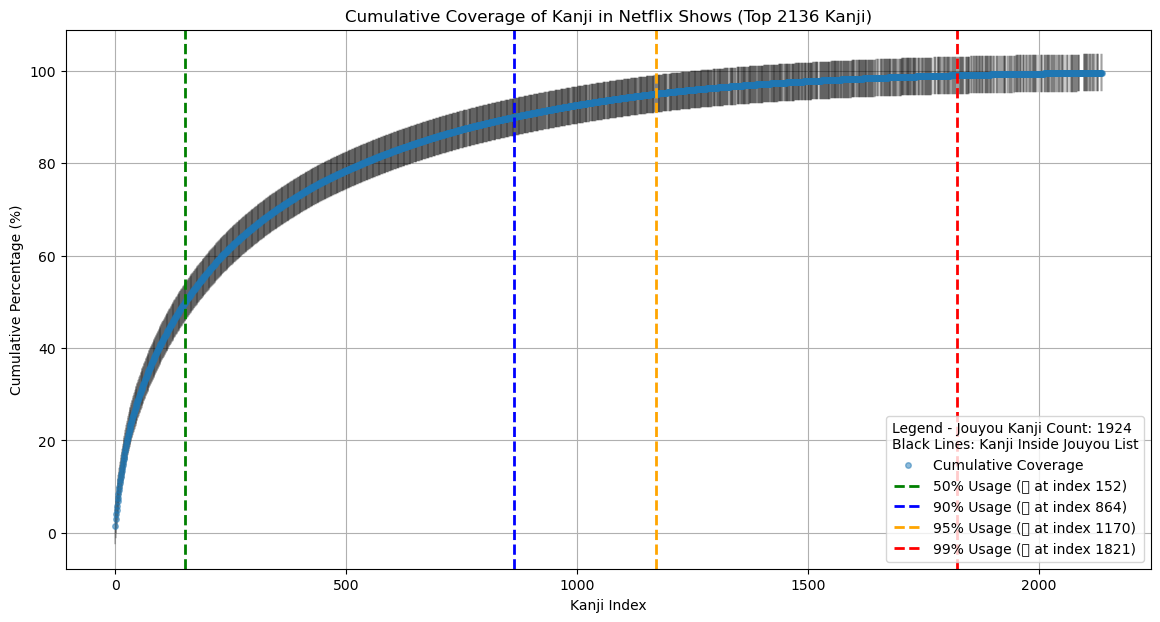

In [44]:
# Counting the number of jouyou kanji in the plot
jouyou_count = netflix_data['is_jouyou'].sum()

plt.figure(figsize=(14, 7))

# Add short vertical black lines for jouyou kanji
for idx in netflix_data[netflix_data['is_jouyou']].index:
    line_bottom = netflix_data.loc[idx, 'cumulative_percentage'] - 4  # Start point slightly below the actual value
    line_top = netflix_data.loc[idx, 'cumulative_percentage'] + 4   # End point slightly above the actual value
    plt.plot([idx, idx], [line_bottom, line_top], color='black', linewidth=0.3, alpha=1)

plt.plot(netflix_data.index, netflix_data['cumulative_percentage'], 'o', markersize=4, label='Cumulative Coverage', alpha=0.5)  # Smaller blue dots

def find_nearest_threshold(threshold):
    idx = (netflix_data['cumulative_percentage'] - threshold).abs().argmin()
    return netflix_data.index[idx]

# Vertical lines for 25%, 50%, and 75% cumulative usage
thresholds = [50, 90, 95, 99]
colors = ['green', 'blue', 'orange', 'red']
labels = ['50% Usage', '90% Usage', '95% Usage', '99% Usage']

for thresh, color, label in zip(thresholds, colors, labels):
    idx = find_nearest_threshold(thresh)
    plt.axvline(x=idx, color=color, linestyle='--', linewidth=2, label=f'{label} ({netflix_data.loc[idx, "kanji"]} at index {idx})')

plt.legend(title=f'Legend - Jouyou Kanji Count: {jouyou_count}\nBlack Lines: Kanji Inside Jouyou List')

plt.title('Cumulative Coverage of Kanji in Netflix Shows (Top 2136 Kanji)')
plt.xlabel('Kanji Index')
plt.ylabel('Cumulative Percentage (%)')
plt.grid(True)
plt.show()